## `Packages`

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, make_scorer, recall_score, roc_curve, auc, precision_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## `Reading the data`

In [43]:
df = pd.read_csv("./data/initial_data.csv")
df

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.12,366.5,0.11940,0.04063,0.1954,0.07976,1.0300,12.30,0.012620,0.01800,0.02220,0.008313,0.16620,0.20310,0.2780,0.11680,0
1,18.95,346.4,0.09688,0.06387,0.1922,0.06491,1.1970,27.10,0.007470,0.03354,0.03504,0.003318,0.12130,0.25150,0.2940,0.07587,0
2,22.41,710.6,0.09057,0.05375,0.1727,0.06317,0.4956,19.53,0.003290,0.01774,0.01172,0.002575,0.13010,0.32990,0.3175,0.09772,1
3,23.75,597.8,0.13230,0.15580,0.2251,0.07421,1.9300,52.72,0.008824,0.03112,0.01998,0.004506,0.22260,0.52090,0.4432,0.10860,1
4,17.46,2010.0,0.11490,0.33680,0.1956,0.06121,0.8509,153.10,0.006369,0.04266,0.02335,0.003385,0.15300,0.59370,0.3690,0.08815,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,18.22,288.1,0.06950,0.00000,0.1653,0.06447,4.8850,21.69,0.001713,0.00000,0.03799,0.001688,0.07117,0.02729,0.1909,0.06559,0
710,21.59,869.5,0.09610,0.13480,0.1896,0.05656,0.9197,45.19,0.005776,0.03695,0.02789,0.002665,0.15630,0.38350,0.4863,0.08633,1
711,23.86,1247.0,0.10800,0.22830,0.2249,0.07469,1.7430,130.80,0.007964,0.07649,0.02736,0.005928,0.13470,0.33910,0.3294,0.09469,1
712,18.18,408.8,0.11750,0.10200,0.1957,0.07255,1.7400,27.85,0.014590,0.04961,0.01807,0.005217,0.17800,0.28780,0.2660,0.09270,0


In [44]:
df.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   texture_mean             714 non-null    float64
 1   area_mean                714 non-null    float64
 2   smoothness_mean          714 non-null    float64
 3   concavity_mean           714 non-null    float64
 4   symmetry_mean            714 non-null    float64
 5   fractal_dimension_mean   714 non-null    float64
 6   texture_se               714 non-null    float64
 7   area_se                  714 non-null    float64
 8   smoothness_se            714 non-null    float64
 9   concavity_se             714 non-null    float64
 10  symmetry_se              714 non-null    float64
 11  fractal_dimension_se     714 non-null    float64
 12  smoothness_worst         714 non-null    float64
 13  compactness_worst        714 non-null    float64
 14  symmetry_worst           7

## `Splitting the data`

In [46]:
X = df.drop("diagnosis", axis =1)
y = df["diagnosis"]

In [47]:
X

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,17.12,366.5,0.11940,0.04063,0.1954,0.07976,1.0300,12.30,0.012620,0.01800,0.02220,0.008313,0.16620,0.20310,0.2780,0.11680
1,18.95,346.4,0.09688,0.06387,0.1922,0.06491,1.1970,27.10,0.007470,0.03354,0.03504,0.003318,0.12130,0.25150,0.2940,0.07587
2,22.41,710.6,0.09057,0.05375,0.1727,0.06317,0.4956,19.53,0.003290,0.01774,0.01172,0.002575,0.13010,0.32990,0.3175,0.09772
3,23.75,597.8,0.13230,0.15580,0.2251,0.07421,1.9300,52.72,0.008824,0.03112,0.01998,0.004506,0.22260,0.52090,0.4432,0.10860
4,17.46,2010.0,0.11490,0.33680,0.1956,0.06121,0.8509,153.10,0.006369,0.04266,0.02335,0.003385,0.15300,0.59370,0.3690,0.08815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,18.22,288.1,0.06950,0.00000,0.1653,0.06447,4.8850,21.69,0.001713,0.00000,0.03799,0.001688,0.07117,0.02729,0.1909,0.06559
710,21.59,869.5,0.09610,0.13480,0.1896,0.05656,0.9197,45.19,0.005776,0.03695,0.02789,0.002665,0.15630,0.38350,0.4863,0.08633
711,23.86,1247.0,0.10800,0.22830,0.2249,0.07469,1.7430,130.80,0.007964,0.07649,0.02736,0.005928,0.13470,0.33910,0.3294,0.09469
712,18.18,408.8,0.11750,0.10200,0.1957,0.07255,1.7400,27.85,0.014590,0.04961,0.01807,0.005217,0.17800,0.28780,0.2660,0.09270


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42, test_size = 0.2)

print(f"The shape of Training data {X_train.shape}")
print(f"The shape of Testing data {X_test.shape}")

The shape of Training data (571, 16)
The shape of Testing data (143, 16)


## `Scaling the data`

In [49]:
scaler = MinMaxScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## `Choosing the primary model`

In [50]:

models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Multilayer Perceptron': MLPClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models with default parameters
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='recall')
    print(f"{model_name}-Cross-validated Recall: {scores.mean()}")

# The Random Forest model performs the best with the highest cross-validation recall score

Random Forest-Cross-validated Recall: 0.9892857142857142
Support Vector Machine-Cross-validated Recall: 0.9363408521303258
Decision Tree-Cross-validated Recall: 0.9644736842105264
Multilayer Perceptron-Cross-validated Recall: 0.9574561403508772
K-Nearest Neighbors-Cross-validated Recall: 0.9221804511278198


## `Random Forest Grid search`

In [51]:
# Create a Random Forest model with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 10, 20],
    'max_features': [ 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

# Create recall scorer for grid search
recall_scorer = make_scorer(recall_score)

# Perform grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid, scoring=recall_scorer, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

# Display the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Train the Random Forest model with the best hyperparameters
tuned_rf_model = grid_search_rf.best_estimator_
tuned_rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = tuned_rf_model.predict(X_test_scaled)

# Evaluate the tuned model on the test set
recall_rf_test = recall_score(y_test, y_pred_rf)
print("Random Forest Test Recall Score:", recall_rf_test)

# Additional metrics
accuracy_rf_test_grid = accuracy_score(y_test, y_pred_rf)
precision_rf_test_grid = precision_score(y_test, y_pred_rf)
f1_rf_test_grid = f1_score(y_test, y_pred_rf)
roc_auc_rf_test_grid = roc_auc_score(y_test, y_pred_rf)

# Display additional metrics
print("Random Forest Test Accuracy:", accuracy_rf_test_grid*100)
print("Random Forest Test Precision:", precision_rf_test_grid)
print("Random Forest Test F1 Score:", f1_rf_test_grid)
print("Random Forest Test ROC-AUC Score:", roc_auc_rf_test_grid)


Best Hyperparameters for Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Test Recall Score: 0.9866666666666667
Random Forest Test Accuracy: 99.3006993006993
Random Forest Test Precision: 1.0
Random Forest Test F1 Score: 0.9932885906040269
Random Forest Test ROC-AUC Score: 0.9933333333333334


## `Random Forest`

In [52]:
# Create a Random Forest model with default parameters
rf_model = RandomForestClassifier(n_estimators=200, criterion='gini',max_features='log2' ,random_state=42)

rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the tuned model on the test set
recall_rf_test = recall_score(y_test, y_pred_rf)
print("Random Forest Test Recall Score:", recall_rf_test)

# Additional metrics
accuracy_rf_test = accuracy_score(y_test, y_pred_rf)
precision_rf_test = precision_score(y_test, y_pred_rf)
f1_rf_test = f1_score(y_test, y_pred_rf)
roc_auc_rf_test = roc_auc_score(y_test, y_pred_rf)

# Display additional metrics
print("Random Forest Test Accuracy:", accuracy_rf_test*100)
print("Random Forest Test Precision:", precision_rf_test)
print("Random Forest Test F1 Score:", f1_rf_test)
print("Random Forest Test ROC-AUC Score:", roc_auc_rf_test)

Random Forest Test Recall Score: 1.0
Random Forest Test Accuracy: 99.3006993006993
Random Forest Test Precision: 0.9868421052631579
Random Forest Test F1 Score: 0.9933774834437086
Random Forest Test ROC-AUC Score: 0.9926470588235294


## `SVM`

In [53]:
# Create an SVM model with default parameters
svm_model = SVC(C=100)

# Fit the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the tuned model on the test set
recall_svm_test = recall_score(y_test, y_pred_svm)
print("SVM Test Recall Score:", recall_svm_test)

# Additional metrics
accuracy_svm_test = accuracy_score(y_test, y_pred_svm)
precision_svm_test = precision_score(y_test, y_pred_svm)
f1_svm_test = f1_score(y_test, y_pred_svm)
roc_auc_svm_test = roc_auc_score(y_test, y_pred_svm)

# Display additional metrics
print("SVM Test Accuracy:", accuracy_svm_test*100)
print("SVM Test Precision:", precision_svm_test)
print("SVM Test F1 Score:", f1_svm_test)
print("SVM Test ROC-AUC Score:", roc_auc_svm_test)

SVM Test Recall Score: 0.9866666666666667
SVM Test Accuracy: 97.9020979020979
SVM Test Precision: 0.9736842105263158
SVM Test F1 Score: 0.9801324503311258
SVM Test ROC-AUC Score: 0.9786274509803923


## `SVM Grid search`

In [54]:
# Create an SVM model with default parameters
svm_model = SVC()

# Define the parameter grid for grid search
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create recall scorer for grid search
recall_scorer_svm = make_scorer(recall_score)

# Perform grid search with 5-fold cross-validation
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, scoring=recall_scorer_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)

# Display the best hyperparameters
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters for SVM:", best_params_svm)

# Train the SVM model with the best hyperparameters
tuned_svm_model = grid_search_svm.best_estimator_
tuned_svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = tuned_svm_model.predict(X_test_scaled)

# Evaluate the tuned model on the test set
recall_svm_test = recall_score(y_test, y_pred_svm)
print("SVM Test Recall Score:", recall_svm_test)

# Additional metrics
accuracy_svm_test_grid = accuracy_score(y_test, y_pred_svm)
precision_svm_test_grid = precision_score(y_test, y_pred_svm)
f1_svm_test_grid = f1_score(y_test, y_pred_svm)
roc_auc_svm_test_grid = roc_auc_score(y_test, y_pred_svm)

# Display additional metrics
print("SVM Test Accuracy:", accuracy_svm_test_grid*100)
print("SVM Test Precision:", precision_svm_test_grid)
print("SVM Test F1 Score:", f1_svm_test_grid)
print("SVM Test ROC-AUC Score:", roc_auc_svm_test_grid)

Best Hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Test Recall Score: 0.9466666666666667
SVM Test Accuracy: 95.8041958041958
SVM Test Precision: 0.9726027397260274
SVM Test F1 Score: 0.9594594594594594
SVM Test ROC-AUC Score: 0.9586274509803921


## `Decision Trees`

In [55]:
dt_model = DecisionTreeClassifier(max_features='sqrt')

dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the tuned model on the test set
recall_dt_test = recall_score(y_test, y_pred_dt)
print("Decision Tree Test Recall Score:", recall_dt_test)

# Additional metrics
accuracy_dt_test = accuracy_score(y_test, y_pred_dt)
precision_dt_test = precision_score(y_test, y_pred_dt)
f1_dt_test = f1_score(y_test, y_pred_dt)
roc_auc_dt_test = roc_auc_score(y_test, y_pred_dt)

# Display additional metrics
print("Decision Tree Test Accuracy:", accuracy_dt_test*100)
print("Decision Tree Test Precision:", precision_dt_test)
print("Decision Tree Test F1 Score:", f1_dt_test)
print("Decision Tree Test ROC-AUC Score:", roc_auc_dt_test)

Decision Tree Test Recall Score: 1.0
Decision Tree Test Accuracy: 95.1048951048951
Decision Tree Test Precision: 0.9146341463414634
Decision Tree Test F1 Score: 0.9554140127388536
Decision Tree Test ROC-AUC Score: 0.948529411764706


## `Decision Trees Grid search`

In [56]:
dt_model = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create recall scorer for grid search
recall_scorer_dt = make_scorer(recall_score)

# Perform grid search with 5-fold cross-validation
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, scoring=recall_scorer_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Display the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Train the Decision Tree model with the best hyperparameters
tuned_dt_model = grid_search_dt.best_estimator_
tuned_dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = tuned_dt_model.predict(X_test)

# Evaluate the tuned model on the test set
recall_dt_test = recall_score(y_test, y_pred_dt)
print("Decision Tree Test Recall Score:", recall_dt_test)

# Additional metrics
accuracy_dt_test_grid = accuracy_score(y_test, y_pred_dt)
precision_dt_test_grid = precision_score(y_test, y_pred_dt)
f1_dt_test_grid = f1_score(y_test, y_pred_dt)
roc_auc_dt_test_grid = roc_auc_score(y_test, y_pred_dt)

# Display additional metrics
print("Decision Tree Test Accuracy:", accuracy_dt_test_grid*100)
print("Decision Tree Test Precision:", precision_dt_test_grid)
print("Decision Tree Test F1 Score:", f1_dt_test_grid)
print("Decision Tree Test ROC-AUC Score:", roc_auc_dt_test_grid)

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Test Recall Score: 0.9866666666666667
Decision Tree Test Accuracy: 98.6013986013986
Decision Tree Test Precision: 0.9866666666666667
Decision Tree Test F1 Score: 0.9866666666666668
Decision Tree Test ROC-AUC Score: 0.9859803921568628


## `K-Nearest Neighbors`

In [57]:
# Create a KNN model with default parameters
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the tuned model on the test set
recall_knn_test = recall_score(y_test, y_pred_knn)
print("KNN Test Recall Score:", recall_knn_test)

# Additional metrics
accuracy_knn_test = accuracy_score(y_test, y_pred_knn)
precision_knn_test = precision_score(y_test, y_pred_knn)
f1_knn_test = f1_score(y_test, y_pred_knn)
roc_auc_knn_test = roc_auc_score(y_test, y_pred_knn)

# Display additional metrics
print("KNN Test Accuracy:", accuracy_knn_test*100)
print("KNN Test Precision:", precision_knn_test)
print("KNN Test F1 Score:", f1_knn_test)
print("KNN Test ROC-AUC Score:", roc_auc_knn_test)

KNN Test Recall Score: 0.92
KNN Test Accuracy: 94.4055944055944
KNN Test Precision: 0.971830985915493
KNN Test F1 Score: 0.9452054794520549
KNN Test ROC-AUC Score: 0.9452941176470588


## `K-Nearest Neighbors Grid search`

In [58]:
# Create a KNN model with default parameters
knn_model = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create recall scorer for grid search
recall_scorer_knn = make_scorer(recall_score)

# Perform grid search with 5-fold cross-validation
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring=recall_scorer_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

# Display the best hyperparameters
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

# Train the KNN model with the best hyperparameters
tuned_knn_model = grid_search_knn.best_estimator_
tuned_knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = tuned_knn_model.predict(X_test_scaled)

# Evaluate the tuned model on the test set
recall_knn_test = recall_score(y_test, y_pred_knn)
print("KNN Test Recall Score:", recall_knn_test)

# Additional metrics
accuracy_knn_test_grid = accuracy_score(y_test, y_pred_knn)
precision_knn_test_grid = precision_score(y_test, y_pred_knn)
f1_knn_test_grid = f1_score(y_test, y_pred_knn)
roc_auc_knn_test_grid = roc_auc_score(y_test, y_pred_knn)

# Display additional metrics
print("KNN Test Accuracy:", accuracy_knn_test_grid*100)
print("KNN Test Precision:", precision_knn_test_grid)
print("KNN Test F1 Score:", f1_knn_test_grid)
print("KNN Test ROC-AUC Score:", roc_auc_knn_test_grid)

Best Hyperparameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
KNN Test Recall Score: 1.0
KNN Test Accuracy: 97.9020979020979
KNN Test Precision: 0.9615384615384616
KNN Test F1 Score: 0.9803921568627451
KNN Test ROC-AUC Score: 0.9779411764705883


## `Multilayer Perceptron`

In [59]:
# Create an MLP model with default parameters
mlp_model = MLPClassifier(random_state=3)

# Fit the model
mlp_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the tuned model on the test set
recall_mlp_test = recall_score(y_test, y_pred_mlp)
print("MLP Test Recall Score:", recall_mlp_test)

# Additional metrics
accuracy_mlp_test = accuracy_score(y_test, y_pred_mlp)
precision_mlp_test = precision_score(y_test, y_pred_mlp)
f1_mlp_test = f1_score(y_test, y_pred_mlp)
roc_auc_mlp_test = roc_auc_score(y_test, y_pred_mlp)

# Display additional metrics
print("MLP Test Accuracy:", accuracy_mlp_test*100)
print("MLP Test Precision:", precision_mlp_test)
print("MLP Test F1 Score:", f1_mlp_test)
print("MLP Test ROC-AUC Score:", roc_auc_mlp_test)

MLP Test Recall Score: 0.96
MLP Test Accuracy: 95.8041958041958
MLP Test Precision: 0.96
MLP Test F1 Score: 0.96
MLP Test ROC-AUC Score: 0.9579411764705882


## `Multilayer Perceptron Grid search`

In [60]:
# Create an MLP model with default parameters
mlp_model = MLPClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (30, 20)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create recall scorer for grid search
recall_scorer_mlp = make_scorer(recall_score)

# Perform grid search with 5-fold cross-validation
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, scoring=recall_scorer_mlp, cv=5)
grid_search_mlp.fit(X_train_scaled, y_train)

# Display the best hyperparameters
best_params_mlp = grid_search_mlp.best_params_
print("Best Hyperparameters for MLP:", best_params_mlp)

# Train the MLP model with the best hyperparameters
tuned_mlp_model = grid_search_mlp.best_estimator_
tuned_mlp_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_mlp = tuned_mlp_model.predict(X_test_scaled)

# Evaluate the tuned model on the test set
recall_mlp_test = recall_score(y_test, y_pred_mlp)
print("MLP Test Recall Score:", recall_mlp_test)

# Additional metrics
accuracy_mlp_test_grid = accuracy_score(y_test, y_pred_mlp)
precision_mlp_test_grid = precision_score(y_test, y_pred_mlp)
f1_mlp_test_grid = f1_score(y_test, y_pred_mlp)
roc_auc_mlp_test_grid = roc_auc_score(y_test, y_pred_mlp)

# Display additional metrics
print("MLP Test Accuracy:", accuracy_mlp_test_grid*100)
print("MLP Test Precision:", precision_mlp_test_grid)
print("MLP Test F1 Score:", f1_mlp_test_grid)
print("MLP Test ROC-AUC Score:", roc_auc_mlp_test_grid)

## `Comparison`

In [61]:
header = ['Random Forest' , 'Support Vector Machine' , 'Decision Tree' , 'Multilayer Perceptron' , 'K-Nearest Neighbors']
table = pd.DataFrame({"Model":header,\
                    "Accuracy(%)":[np.round(accuracy_rf_test*100,2) , np.round(accuracy_svm_test*100,2) , np.round(accuracy_dt_test*100,2) , np.round(accuracy_mlp_test*100,2) , np.round(accuracy_knn_test*100,2)] ,\
                    "Precision":[np.round(precision_rf_test,2) , np.round(precision_svm_test,2) , np.round(precision_dt_test,2) , np.round(precision_mlp_test,2) , np.round(precision_knn_test,2)] ,\
                    "Recall":[np.round(recall_rf_test,2) , np.round(recall_svm_test,2) , np.round(recall_dt_test,2) , np.round(recall_mlp_test,2) , np.round(recall_knn_test,2)] ,\
                    "F1 Score":[np.round(f1_rf_test,2) , np.round(f1_svm_test,2) , np.round(f1_dt_test,2) , np.round(f1_mlp_test,2) , np.round(f1_knn_test,2)] ,\
                    "ROC-AUC":[np.round(roc_auc_rf_test,2) , np.round(roc_auc_svm_test,2) , np.round(roc_auc_dt_test,2) , np.round(roc_auc_mlp_test,2) , np.round(roc_auc_knn_test,2)]
                    })

In [62]:
table

,Model,Accuracy(%),Precision,Recall,F1 Score,ROC-AUC
0,Random Forest,99.30,0.99,1.00,0.99,0.99
1,Support Vector Machine,97.90,0.97,0.95,0.98,0.98
2,Decision Tree,95.10,0.91,0.99,0.96,0.95
3,Multilayer Perceptron,95.80,0.96,0.96,0.96,0.96
4,K-Nearest Neighbors,94.41,0.97,1.00,0.95,0.95


## `Results and discussion`

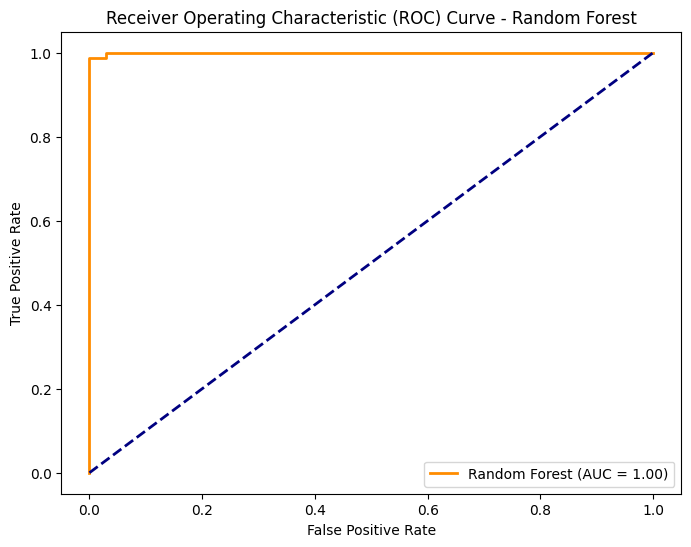

In [63]:
# ROC curve for the RF model on initial dataset
# Get the predicted probabilities for the positive class
y_probs_rf = tuned_rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)

# Calculate the area under the ROC curve (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()